# Credit Card Attrition

The dataset used in this notebook was taken from https://zenodo.org/record/4322342#.Y_9CXexByWV. It contains customer information collected from within a consumer credit card portfolio.

### I. Business Understanding

The goal of collecting the dataset is to help predict customer attrition. The data is labeled to show if the customer is existing or attrited. Attrited customers are those who has ceased to be customer and the goal is to help understand what are the factors why a customer has attrited. If the business is able to understand these factors and predict if a customer will churn, the business can act proactive to prevent the probable attrition. To help us in understanding the, the dataset includes demographics, income category, and customer relationship information.

### II. Data Understanding

To help us with the goal of predicting customer attrition, we first need to understand the dataset. To do this we need to explore the data using Python libraries such as pandas, numpy, and scikit learn.

Let's first import the Python libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor

We then load the dataset into a dataframe for us to explore:

In [3]:
df = pd.read_csv('BankChurners.csv')

Let's sample the data and display it. And try to understand the features of the dataset. We can also refer to this Kaggle link https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m to learn about the individual features.

In [4]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
2668,818294958,Existing Customer,52,M,2,College,Married,$120K +,Blue,47,...,27347.0,719,26628.0,0.695,4040,77,0.674,0.026,0.000175,0.99983
5262,709486158,Existing Customer,33,F,3,Graduate,Married,Less than $40K,Blue,20,...,1438.3,0,1438.3,0.896,4530,72,0.636,0.000,0.000096,0.99990
9850,710639658,Attrited Customer,29,M,1,High School,Single,$60K - $80K,Blue,17,...,17744.0,829,16915.0,0.851,9658,78,0.773,0.047,0.988310,0.01169
1201,789344358,Existing Customer,57,F,1,Unknown,Married,Less than $40K,Blue,47,...,3416.0,2468,948.0,0.598,1536,42,0.556,0.722,0.000096,0.99990
8206,713759583,Existing Customer,54,F,3,High School,Married,Less than $40K,Blue,36,...,3173.0,1822,1351.0,0.801,4883,71,0.614,0.574,0.000034,0.99997
5103,827619933,Existing Customer,48,M,2,Uneducated,Single,$40K - $60K,Blue,44,...,9673.0,0,9673.0,0.655,3541,87,0.851,0.000,0.000057,0.99994
918,716032233,Existing Customer,42,M,2,College,Married,$80K - $120K,Blue,32,...,22120.0,1805,20315.0,0.650,3981,65,0.667,0.082,0.000111,0.99989
2253,771852483,Existing Customer,46,M,3,Graduate,Single,$80K - $120K,Blue,35,...,4930.0,0,4930.0,1.019,3343,77,0.638,0.000,0.000535,0.99946
2570,721150833,Existing Customer,37,M,1,Graduate,Single,$80K - $120K,Blue,18,...,5110.0,1942,3168.0,0.749,3028,76,0.583,0.380,0.000530,0.99947
9348,709934808,Existing Customer,59,M,1,Unknown,Single,$40K - $60K,Silver,51,...,15164.0,1071,14093.0,0.900,13062,103,0.717,0.071,0.000064,0.99994


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Our dataset should have a minimum 1,000 instance as a requirement. Let's check how many.

In [7]:
df.shape[0]

10127

Let's undertand the demographics of the customers.

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
ax = sns.countplot(x='Customer_Age', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,2)
ax = sns.countplot(x='Gender', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,3)
ax = sns.countplot(x='Dependent_count', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,4)
ax = sns.countplot(x='Education_Level', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,5)
ax = sns.countplot(x='Income_Category', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,6)
ax = sns.countplot(x='Card_Category', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,7)
ax = sns.countplot(x='Months_on_book', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,8)
ax = sns.countplot(x='Attrition_Flag', data=df)
ax.set_ylabel('# of Customers')

Text(0, 0.5, '# of Customers')

Let's perform some visualization to check if the customer attrition has visual correlation to other features:

In [9]:
sns.scatterplot(x=df['Customer_Age'], y=df['Avg_Utilization_Ratio'], hue=df['Attrition_Flag'])

In [10]:
sns.scatterplot(x=df['Customer_Age'], y=df['Total_Amt_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

In [11]:
sns.scatterplot(x=df['Credit_Limit'], y=df['Total_Amt_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

In [12]:
sns.scatterplot(x=df['Credit_Limit'], y=df['Total_Ct_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

### III. Data Preparation

Now that we have a good understanding of the data, let's perform some data prepartion.

Remember, our attrition data is skewed, because attrited customer is way less that existing customer which is expected. But let's perform undersampling to balance this so that our model is not biased.

In [13]:
# Reference: https://www.linkedin.com/pulse/predicting-customer-churn-na%C3%AFve-bayes-classifier-python-prego

print('Distribution Before Undersampling')
out = df['Attrition_Flag'].value_counts()
print(out)

count_class_1 = sum(df['Attrition_Flag']=='Attrited Customer')
class_0 = df[df['Attrition_Flag']=='Existing Customer']
class_1 = df[df['Attrition_Flag']=='Attrited Customer']

under_class_0 = class_0.sample(count_class_1)
df = pd.concat([under_class_0, class_1], axis=0)
print('\n')
print('Distribution After Undersampling')
print(df['Attrition_Flag'].value_counts())

Distribution Before Undersampling
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Distribution After Undersampling
Existing Customer    1627
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Now that we've done undersampling, let's see it visually.

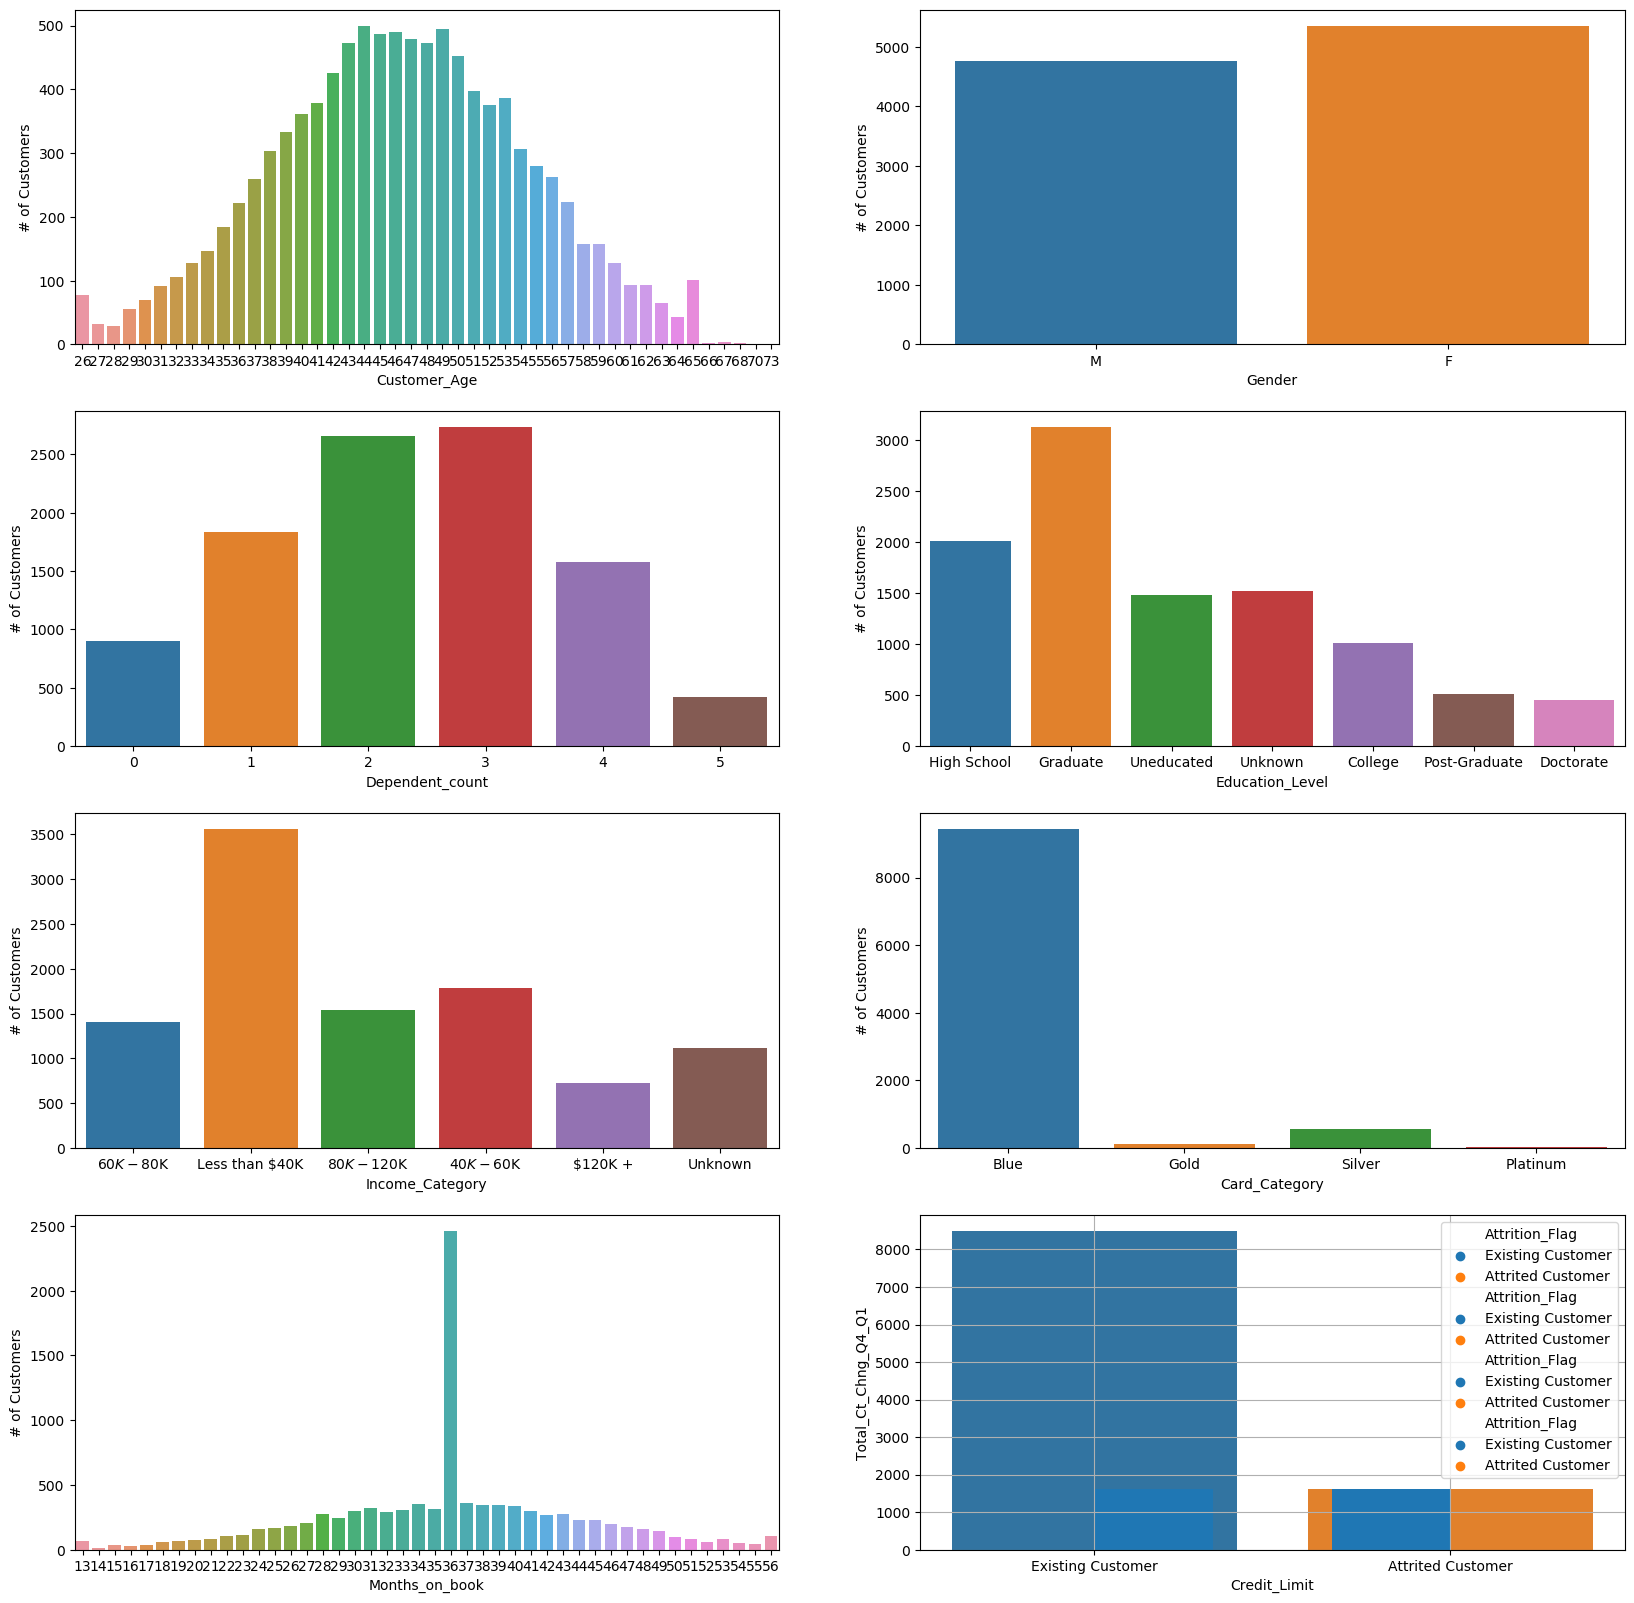

In [14]:
df['Attrition_Flag'].hist(bins=3)
plt.show()

Below are the list of things we've done with the data:

1. Standardize the feature names.
2. Convert attrition feature to boolean.
3. Perform one-hot encoding on categorical features.
4. Drop features that we do not need.

In [15]:
# rename columns
df.rename(
    columns={
        'Customer_Age':'age',
        'Dependent_count':'dependents',
        'Months_on_book':'months_on_book',
        'Total_Relationship_Count':'total_relationship_count',
        'Months_Inactive_12_mon':'months_inactive_12_mon',
        'Contacts_Count_12_mon':'contacts_count_12_mon',
        'Credit_Limit':'credit_limit',
        'Total_Revolving_Bal':'total_revolving_balance',
        'Avg_Open_To_Buy':'average_open_to_buy',
        'Total_Amt_Chng_Q4_Q1':'total_amount_change_q4_q1',
        'Total_Trans_Amt':'total_transaction_amount',
        'Total_Trans_Ct':'total_transaction_count',
        'Total_Ct_Chng_Q4_Q1':'total_count_change_q4_q1',
        'Avg_Utilization_Ratio':'average_utilization_ratio'
    },
    inplace=True
)

# one-hot encoding
df['gender_male'] = np.where(df['Gender']=='M', 1, 0)
df['gender_female'] = np.where(df['Gender']=='F', 1, 0)
df['education_high_school'] = np.where(df['Education_Level']=='High School', 1, 0)
df['education_graduate'] = np.where(df['Education_Level']=='Graduate', 1, 0)
df['education_uneducated'] = np.where(df['Education_Level']=='Uneducated', 1, 0)
df['education_unknown'] = np.where(df['Education_Level']=='Unknown', 1, 0)
df['education_college'] = np.where(df['Education_Level']=='College', 1, 0)
df['education_post_graduate'] = np.where(df['Education_Level']=='Post-Graduate', 1, 0)
df['education_doctorate'] = np.where(df['Education_Level']=='Doctorate', 1, 0)
df['marital_married'] = np.where(df['Marital_Status']=='Married', 1, 0)
df['marital_single'] = np.where(df['Marital_Status']=='Single', 1, 0)
df['marital_unknown'] = np.where(df['Marital_Status']=='Unknown', 1, 0)
df['marital_divorced'] = np.where(df['Marital_Status']=='Divorced', 1, 0)
df['income_less_than_40k'] = np.where(df['Income_Category']=='Less than $40K', 1, 0)
df['income_40k_60k'] = np.where(df['Income_Category']=='$40K - $60K', 1, 0)
df['income_60k_80k'] = np.where(df['Income_Category']=='$60K - $80K', 1, 0)
df['income_80k_120k'] = np.where(df['Income_Category']=='$80K - $120K', 1, 0)
df['income_more_than_120k'] = np.where(df['Income_Category']=='$120K +', 1, 0)
df['income_unknown'] = np.where(df['Income_Category']=='Unknown', 1, 0)
df['card_blue'] = np.where(df['Card_Category']=='Blue', 1, 0)
df['card_gold'] = np.where(df['Card_Category']=='Gold', 1, 0)
df['card_silver'] = np.where(df['Card_Category']=='Silver', 1, 0)
df['card_platinum'] = np.where(df['Card_Category']=='Platinum', 1, 0)

# label feature
df['attrition'] = np.where(df['Attrition_Flag']=='Existing Customer', 0, 1)

# drop columns
df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Attrition_Flag', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Education_Level', axis=1)
df = df.drop('Marital_Status', axis=1)
df = df.drop('Income_Category', axis=1)
df = df.drop('Card_Category', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

After performing data preparation, let's sample the data to see how it looks like.

In [16]:
df.sample(10)

,age,dependents,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_balance,average_open_to_buy,total_amount_change_q4_q1,...,income_40k_60k,income_60k_80k,income_80k_120k,income_more_than_120k,income_unknown,card_blue,card_gold,card_silver,card_platinum,attrition
4447,50,2,41,2,3,2,2751.0,2253,498.0,0.497,...,0,0,0,0,1,1,0,0,0,1
5979,41,4,28,3,2,3,34516.0,825,33691.0,0.616,...,0,0,1,0,0,0,0,1,0,1
7817,47,3,32,2,1,1,11671.0,1304,10367.0,0.491,...,0,0,1,0,0,1,0,0,0,0
8698,40,3,28,2,2,3,9243.0,2019,7224.0,0.707,...,1,0,0,0,0,1,0,0,0,0
2735,28,0,15,3,3,3,32024.0,1232,30792.0,1.040,...,0,0,0,0,1,0,0,1,0,0
4369,45,2,34,5,3,1,5371.0,1499,3872.0,0.737,...,0,0,0,0,0,1,0,0,0,0
7906,48,2,41,4,2,3,2168.0,1323,845.0,0.687,...,0,0,0,0,0,1,0,0,0,1
8666,42,4,36,2,2,1,34516.0,2253,32263.0,0.853,...,0,0,1,0,0,0,0,1,0,0
4858,48,2,29,6,1,2,9554.0,2337,7217.0,0.790,...,0,0,0,0,1,1,0,0,0,0
1529,38,1,22,3,3,3,2484.0,2149,335.0,0.669,...,0,0,0,0,0,1,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 9454 to 10126
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3254 non-null   int64  
 1   dependents                 3254 non-null   int64  
 2   months_on_book             3254 non-null   int64  
 3   total_relationship_count   3254 non-null   int64  
 4   months_inactive_12_mon     3254 non-null   int64  
 5   contacts_count_12_mon      3254 non-null   int64  
 6   credit_limit               3254 non-null   float64
 7   total_revolving_balance    3254 non-null   int64  
 8   average_open_to_buy        3254 non-null   float64
 9   total_amount_change_q4_q1  3254 non-null   float64
 10  total_transaction_amount   3254 non-null   int64  
 11  total_transaction_count    3254 non-null   int64  
 12  total_count_change_q4_q1   3254 non-null   float64
 13  average_utilization_ratio  3254 non-null   f

Then split the data into training and test dataset. Our test dataset is at 30%.

In [18]:
#X = df.drop(['attrition','CLIENTNUM'], axis=1)
#y = df['attrition']

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.3, random_state=12345
#)

Then we'll normalize our dataset.

In [19]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

### IV. Modeling and Evaluation

Let's train our model and perform evaluation.

In [20]:
# import sagemaker library
import sagemaker
bucket=sagemaker.Session().default_bucket()
prefix = 'csci-271/xgboost'
 
# Define IAM role
import os
import boto3
import re
from sagemaker import get_execution_role

role = get_execution_role()

In [21]:
bucket

'sagemaker-ap-southeast-1-066334331154'

In [22]:
# randomly sort the data then split out first 70%, second 20%, and last 10%
train_data, validation_data, test_data = np.split(df.sample(frac=1, random_state=1729), [int(0.7 * len(df)), int(0.9 * len(df))])

In [23]:
# save the training and validation data to csv
pd.concat([train_data['attrition'], train_data.drop('attrition', axis=1)], axis=1).to_csv('train.csv', index=False, header=False)
pd.concat([validation_data['attrition'], validation_data.drop('attrition', axis=1)], axis=1).to_csv('validation.csv', index=False, header=False)

In [24]:
# upload the training and validation data to S3
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

In [25]:
# get the ECR container for XGBoost
container = sagemaker.image_uris.retrieve(region=boto3.Session().region_name, framework='xgboost', version='latest')

In [26]:
# add the data as training input
s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

In [27]:
# train
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation}) 

INFO:sagemaker:Creating training-job with name: xgboost-2023-04-07-01-28-31-964


2023-04-07 01:28:32 Starting - Starting the training job...
2023-04-07 01:28:56 Starting - Preparing the instances for training......
2023-04-07 01:29:49 Downloading - Downloading input data...
2023-04-07 01:30:19 Training - Downloading the training image...
2023-04-07 01:31:10 Uploading - Uploading generated training modelArguments: train
[2023-04-07:01:31:06:INFO] Running standalone xgboost training.
[2023-04-07:01:31:06:INFO] File size need to be processed in the node: 0.29mb. Available memory size in the node: 8598.41mb
[2023-04-07:01:31:06:INFO] Determined delimiter of CSV input is ','
[01:31:06] S3DistributionType set as FullyReplicated
[01:31:06] 2277x37 matrix with 84249 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-04-07:01:31:06:INFO] Determined delimiter of CSV input is ','
[01:31:06] S3DistributionType set as FullyReplicated
[01:31:06] 651x37 matrix with 24087 entries loaded from /opt/ml/input/data/validation?format=csv&label_colum

### V. Deploying the Model to a Real-Time Endpoint

In [28]:
# deploy the model
xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2023-04-07-01-31-54-087
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-04-07-01-31-54-087
INFO:sagemaker:Creating endpoint with name xgboost-2023-04-07-01-31-54-087


-----!

In [29]:
# evaluate the model
xgb_predictor.serializer = sagemaker.serializers.CSVSerializer()

def predict(data, predictor, rows=500 ):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.drop('attrition', axis=1).to_numpy(), xgb_predictor)

In [30]:
# confusion matrix
pd.crosstab(index=test_data['attrition'], columns=np.round(predictions), rownames=['actuals'], colnames=['predictions'])

predictions,0.0,1.0
actuals,,
0,159,8
1,4,155


### VI. Real-Time Endpoint Invocation

In [31]:
# define SageMaker runtime
runtime = boto3.client(service_name="sagemaker-runtime")

In [32]:
# define the endpoint
endpoint_name = 'xgboost-2023-04-07-01-31-54-087'

In [33]:
# invoke endpoint
payload = b"51., 1., 39., 5., 3., 2., 1438.3, 0., 1438.3, 0.885, 2492, 35., 0.296, 0.0, 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0."

response = runtime.invoke_endpoint(
    EndpointName=endpoint_name,
    Body=payload,
    ContentType="text/csv",
)

print(response["Body"].read().decode())

0.9960237741470337
